In [2]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)
#!pip install astroquery
from astroquery.gaia import Gaia

tables=Gaia.load_tables(only_names=True)
for table in tables:
  print(table.name)

from astroquery.gaia import Gaia



INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
external.xgboost_table1
external.xgboost_table2
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neigh

In [206]:
from astroquery.gaia import Gaia

# Example query: Fetch the first 100 rows from the gaiadr3.vari_rrlyrae table
query = """
SELECT *
FROM gaiadr3.vari_rrlyrae

"""

# Execute the query
job = Gaia.launch_job(query)
result = job.get_results()

result


solution_id,SOURCE_ID,pf,pf_error,p1_o,p1_o_error,epoch_g,epoch_g_error,epoch_bp,epoch_bp_error,epoch_rp,epoch_rp_error,epoch_rv,epoch_rv_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,average_rv,average_rv_error,peak_to_peak_g,peak_to_peak_g_error,peak_to_peak_bp,peak_to_peak_bp_error,peak_to_peak_rp,peak_to_peak_rp_error,peak_to_peak_rv,peak_to_peak_rv_error,metallicity,metallicity_error,r21_g,r21_g_error,r31_g,r31_g_error,phi21_g,phi21_g_error,phi31_g,phi31_g_error,num_clean_epochs_g,num_clean_epochs_bp,num_clean_epochs_rp,num_clean_epochs_rv,zp_mag_g,zp_mag_bp,zp_mag_rp,num_harmonics_for_p1_g,num_harmonics_for_p1_bp,num_harmonics_for_p1_rp,num_harmonics_for_p1_rv,reference_time_g,reference_time_bp,reference_time_rp,reference_time_rv,fund_freq1,fund_freq1_error,fund_freq2,fund_freq2_error,fund_freq1_harmonic_ampl_g,fund_freq1_harmonic_ampl_g_error,fund_freq1_harmonic_phase_g,fund_freq1_harmonic_phase_g_error,fund_freq1_harmonic_ampl_bp,fund_freq1_harmonic_ampl_bp_error,fund_freq1_harmonic_phase_bp,fund_freq1_harmonic_phase_bp_error,fund_freq1_harmonic_ampl_rp,fund_freq1_harmonic_ampl_rp_error,fund_freq1_harmonic_phase_rp,fund_freq1_harmonic_phase_rp_error,fund_freq1_harmonic_ampl_rv,fund_freq1_harmonic_ampl_rv_error,fund_freq1_harmonic_phase_rv,fund_freq1_harmonic_phase_rv_error,best_classification,g_absorption,g_absorption_error
,,d,d,d,d,d,d,d,d,d,d,d,d,mag,mag,mag,mag,mag,mag,km / s,km / s,mag,mag,mag,mag,mag,mag,km / s,km / s,dex,dex,,,,,rad,rad,rad,rad,,,,,mag,mag,mag,,,,,d,d,d,d,1 / d,1 / d,1 / d,1 / d,mag,mag,rad,rad,mag,mag,rad,rad,mag,mag,rad,rad,km / s,km / s,rad,rad,,mag,mag
int64,int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,int16,int16,int16,int16,float64,float64,float64,float64,float64,float32,float64,float32,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float32,float32
375316653866487565,244893954275107200,--,--,0.26417931251544163,5.460413e-06,1739.372652860014,7.722189e-06,--,--,--,--,--,--,20.590977,0.016150672,--,--,--,--,--,--,0.3157706,0.07049007,--,--,--,--,--,--,--,--,0.44660765,0.096027955,--,--,4.6967587,0.41436586,--,--,27,2,1,--,20.594252,--,--,2,20,20,--,1739.9662637752363,--,--,--,3.7853077535794886,7.823982e-05,--,--,[0.12596836686134338 0.056258440017700195 -- -- -- -- -- -- -- -- -- -- --\n -- -- --],[0.021578732877969742 0.016172219067811966 -- -- -- -- -- -- -- -- -- --\n -- -- -- --],[4.1964921951293945 0.5233719944953918 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0\n 0.0 0.0 0.0 0.0 0.0],[0.21865670382976532 0.5344235897064209 -- -- -- -- -- -- -- -- -- -- --\n -- -- --],[],[],[],[],[],[],[],[],[],[],[],[],RRc,--,--
375316653866487565,245002531050576896,0.5205123049162365,5.9112863e-06,--,--,1705.1323363868853,8.359822e-06,1705.1414775254216,1.0046097e-05,1705.1311474358477,6.545865e-06,--,--,15.929145,0.010242176,16.356573,0.018603276,15.278727,0.009487258,--,--,0.9385019,0.120727494,1.0994217,0.10973381,0.8165013,0.06977717,--,--,-0.8708563,0.47518787,0.47389403,0.08163338,0.31729943,0.05761884,4.024685,0.12488823,2.1125093,0.25776532,45,44,44,--,15.964044,16.411121,15.302456,4,3,4,--,1706.5856067422114,1706.5859002172215,1706.585988363658,--,1.921184169048463,2.1818254e-05,--,--,[0.32880035042762756 0.15581652522087097 0.10432817041873932\n 0.06540334969758987 -- -- -- -- -- -- -- -- -- -- -- --],[0.014035544358193874 0.027286922559142113 0.023547401651740074\n 0.0244175773113966 -- -- -- -- -- -- -- -- -- -- -- --],[1.2044552564620972 0.15041014552116394 5.725874900817871 5.31508207321167\n 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0],[0.0973383411

In [83]:


import numpy as np 
from astroquery.gaia import Gaia

# Define the ADQL query
query = """
SELECT 
TOP 15000000
    fgkm.*, 
    gaia.ra,gaia.ra_error,gaia.dec_error, 
    gaia.dec, 
    gaia.parallax, 
    gaia.pmra, 
    gaia.pmdec, 
    gaia.pmra_error, 
    gaia.pmdec_error, 
    gaia.parallax_error,
    gaia.b,
    gaia.l,
    gaia.pmra_pmdec_corr, 
    gaia.parallax_pmra_corr, 
    gaia.parallax_pmdec_corr,
    gaia.radial_velocity, 
    gaia.radial_velocity_error, 
    gaia.rv_template_teff, 
    gaia.grvs_mag,
    gaia.phot_g_mean_mag, 
    gaia.bp_rp, 
    gaia.bp_g, 
    gaia.g_rp, 
    ap.abp_gspphot,ap.spectraltype_esphs, 
    ap.arp_gspphot
FROM gaiadr3.gaia_source AS gaia
JOIN gaiadr3.gold_sample_fgkm_stars AS fgkm USING (source_id)
JOIN gaiadr3.astrophysical_parameters AS ap USING (source_id)
WHERE ap.spectraltype_esphs='K'






"""


# Execute the query
job = Gaia.launch_job(query)
results1 = job.get_results()
a=np.sum(np.isnan(np.array(results1['radial_velocity'])))
b=len(results1['radial_velocity'])-a
b

24552

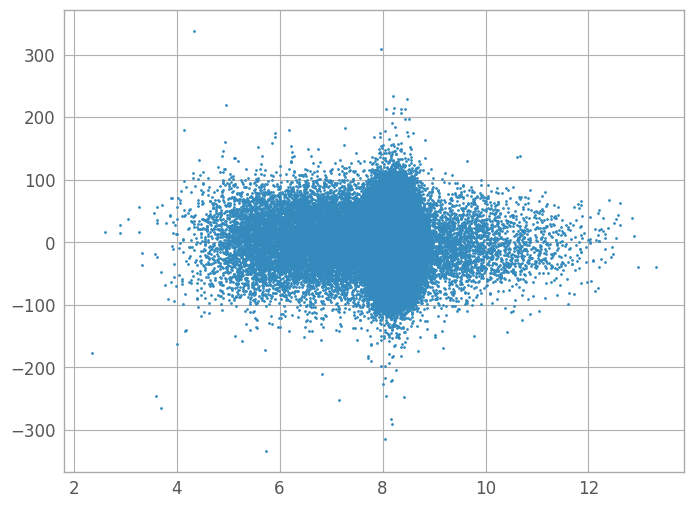

In [11]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error = np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error = np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error = np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,246, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    v_x, v_y, v_z = g.v_x.value, g.v_y.value, g.v_z.value
    
    # Convert to cylindrical coordinates
    R = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    v_R = (x * v_x + y * v_y) / R
    v_phi = (x * v_y - y * v_x) / R
    return np.array([R, phi, z, v_R, v_phi, v_z, np.abs(z)])

plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),s=1)



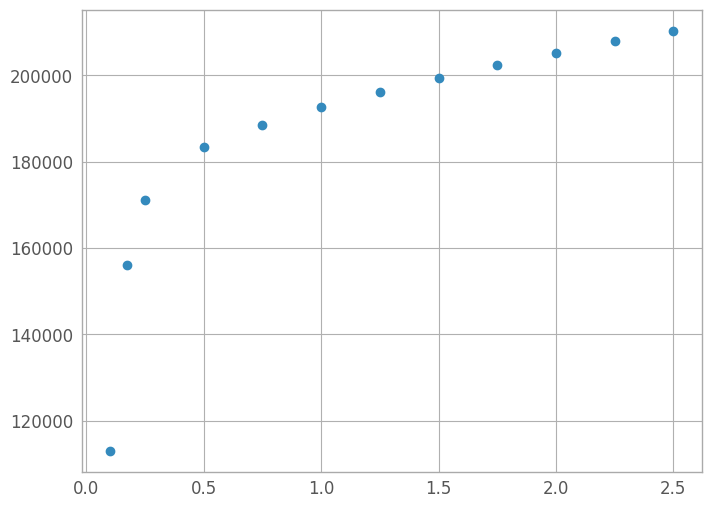

In [20]:
a=[0.5,1.0,0.75,0.1,0.25,1.25,0.175,1.5,1.75,2.0,2.25,2.5]
b=[183393,192715,188588,113081,171056,196231,156035,199308,202376,205259,207935,210338]
plt.scatter(a,b)

# Globular cluster 

In [22]:
!pip install lxml

                                              0.0/3.8 MB ? eta -:--:--
     --                                       0.3/3.8 MB 7.9 MB/s eta 0:00:01
     -----------                              1.1/3.8 MB 16.9 MB/s eta 0:00:01
     -------------------                      1.8/3.8 MB 16.6 MB/s eta 0:00:01
     --------------------------               2.6/3.8 MB 18.2 MB/s eta 0:00:01
     -----------------------------------      3.4/3.8 MB 18.0 MB/s eta 0:00:01
     ---------------------------------------  3.8/3.8 MB 17.3 MB/s eta 0:00:01
     ---------------------------------------- 3.8/3.8 MB 15.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
import pandas as pd

# Define file path
file1 = '1.txt'

# Define column names based on the structure of your file
columns_file1 = ["ID", "Name", "RA", "DEC", "L", "B", "R_Sun", "R_gc", "X", "Y", "Z"]

# Read the file into a DataFrame
df1 = pd.read_csv(file1, delim_whitespace=True, header=None, names=columns_file1, engine='python')

# Extract RA and DEC columns as lists
ra_list = df1['RA'].tolist()
dec_list = df1['DEC'].tolist()

# Print the lists
print("RA List:", ra_list)
print("DEC List:", dec_list)


C:\Users\sutir\AppData\Local\Temp\ipykernel_24976\3470809876.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = pd.read_csv(file1, delim_whitespace=True, header=None, names=columns_file1, engine='python')


ParserError: Expected 12 fields in line 3, saw 17. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

# RA DEC CONV


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1285987579.py, line 1)

In [43]:
def ra_to_degrees(hours, minutes, seconds):
    """
    Convert Right Ascension (RA) from hours, minutes, and seconds to degrees.

    Parameters:
        hours (float): Hours component of RA.
        minutes (float): Minutes component of RA.
        seconds (float): Seconds component of RA.

    Returns:
        float: RA in degrees.
    """
    return 15 * (hours + minutes / 60 + seconds / 3600)

def dec_to_degrees(degrees, arcminutes, arcseconds):
    """
    Convert Declination (DEC) from degrees, arcminutes, and arcseconds to degrees.

    Parameters:
        degrees (float): Degrees component of DEC.
        arcminutes (float): Arcminutes component of DEC.
        arcseconds (float): Arcseconds component of DEC.

    Returns:
        float: DEC in degrees.
    """
    if degrees < 0:
        return degrees - (arcminutes / 60 + arcseconds / 3600)
    else:
        return degrees + (arcminutes / 60 + arcseconds / 3600)

def convert_ra_dec_list(ra_list, dec_list):
    """
    Convert lists of RA and DEC values into degrees.

    Parameters:
        ra_list (list of str): List of RA strings, each in the format "HH MM SS.S".
        dec_list (list of str): List of DEC strings, each in the format "DD MM SS.S".

    Returns:
        list of tuple: List of tuples containing (RA in degrees, DEC in degrees).
    """
    converted = []
    for ra, dec in zip(ra_list, dec_list):
        ra_parts = list(map(float, ra.split()))
        dec_parts = list(map(float, dec.split()))

        ra_deg = ra_to_degrees(*ra_parts)
        dec_deg = dec_to_degrees(*dec_parts)

        converted.append((ra_deg, dec_deg))
    return converted

# Example usage
ra_list = ["00 24 05.67","00 52 45.24","01 03 14.26","02 02 57","03 12 16.21","03 33 20.04","03 55 02.3","04 24 44.5","04 46 05.91","05 14 06.76","05 24 11.09","06 48 59.41","07 38 08.47","07 58 17.0","09 07 57.8","09 12 03.10","09 20 57.07","10 05 31.9","10 17 36.82","11 29 16.80","11 59 18.5","12 10 06.30","12 25 45.40","12 38 40.2","12 39 27.98","12 59 33.92","13 12 55.25","13 16 27.09","13 26 47.24","13 42 11.62","13 46 26.81","13 56 21.7","14 05 27.29","14 29 37.23","14 39 36.29","15 00 18.45","15 03 58.63","15 16 05.25","15 17 24.50","15 18 33.22","15 28 00.69","15 35 28.52","15 39 07.45","15 46 03.00","16 11 03.65","16 11 00.6","16 17 02.41","16 23 35.22","16 25 48.12","16 27 13.86","16 27 40.37","16 28 40.08","16 32 31.86","16 39 25.45","16 41 41.24","16 46 58.79","16 47 14.18","16 52 10.6","16 53 25.31","16 57 09.05","16 59 32.62","16 59 51.0","17 01 12.80","17 02 37.80","17 04 28.51","17 05 09.13","17 10 10.20","17 14 32.25","17 16 37.30","17 17 07.39","17 17 59.21","17 19 11.26","17 21 10.08","17 23 34.93","17 23 58.59","17 25 29.11","17 27 08.5","17 27 33.10","17 27 44.24","17 30 39.00","17 31 05.2","17 31 54.99","17 33 24.50","17 34 28.0","17 35 47.8","17 36 10.5","17 36 17.23","17 37 36.10","17 38 36.60","17 40 42.09","17 43 42.2","17 44 54.65","17 47 28.3","17 48 04.80","17 48 52.70","17 50 13.06","17 50 46.38","17 50 51.70","17 54 27.2","17 59 03.68","18 01 38.8","18 01 49.1","18 01 50.52","18 03 36.4","18 03 34.02","18 03 50.51","18 04 49.64","18 04 49.68","18 06 08.6","18 07 20.58","18 08 02.36","18 08 21.81","18 09 06.0","18 09 17.60","18 09 36.50","18 10 17.60","18 10 44.20","18 12 15.8","18 13 38.80","18 14 06.6","18 18 30.5","18 18 37.60","18 23 40.51","18 24 32.81","18 30 56.10","18 31 23.10","18 31 54.10","18 35 45.63","18 36 23.94","18 41 29.9","18 43 12.76","18 48 49.7","18 53 04.30","18 55 03.33","18 55 06.04","18 59 33.15","19 05 15.3","19 10 52.11","19 11 12.01","19 16 35.57","19 17 43.92","19 18 02.1","19 28 44.11","19 39 59.71","19 41 44.41","19 45 14.4","19 53 46.49","20 06 04.69","20 34 11.37","20 53 27.70","21 01 29.38","21 29 58.33","21 33 27.02","21 40 22.12","21 46 38.84","23 06 44.44","23 08 26.63"
]  # Example RA values
dec_list = ["-72 04 52.6","-26 34 57.4","-70 50 55.6","-03 15 10","-55 12 58.4","+79 34 51.8","-49 36 55","-21 11 13","+31 22 53.4","-40 02 47.6","-24 31 29.0","-36 00 19.1","+38 52 56.8","+26 15 18","-37 13 17","-64 51 48.6","-77 16 54.8","+00 04 18","-46 24 44.9","+28 58 24.9","+12 15 36","+18 32 33.5","-72 39 32.4","-51 09 01","-26 44 38.6","-70 52 35.4","+18 10 05.4","+17 42 00.9","-47 28 46.5","+28 22 38.2","-51 22 27.3","-27 10 03","+28 32 04.0","-05 58 35.1","-26 32 20.2","-82 12 49.3","-33 04 05.6","-00 06 41.8","-21 00 37.0","+02 04 51.7","-50 40 22.9","-50 39 34.8","-50 03 09.8","-37 47 11.1","-55 19 04.0","+14 57 28","-22 58 33.9","-26 31 32.7","-72 12 07.9","-26 01 24.6","-38 50 55.5","-35 21 12.5","-13 03 13.6","-28 23 55.3","+36 27 35.5","+47 31 39.9","-01 56 54.7","-47 03 29","-22 10 38.8","-04 06 01.1","-37 07 17.0","-00 32 20","-30 06 49.4","-26 16 04.7","-24 45 53.5","-22 42 30.1","-26 34 55.5","-29 27 43.3","-28 08 24.4","+43 08 09.4","-23 45 57.6","-18 30 57.4","-19 35 14.7","-17 48 46.9","-26 21 12.3","-48 25 19.8","-07 05 35","-30 48 08.4","-05 04 47.5","-31 35 43.9","-29 58 54","-67 02 54.0","-33 23 20.4","-39 04 09","-30 28 11","-38 33 12","-44 44 07.8","-03 14 45.3","-23 54 34.2","-53 40 27.6","-26 13 21","+03 10 12.5","-33 03 56","-24 46 45","-20 21 36.9","-37 03 05.2","-31 16 31.4","-34 35 57.0","-24 08 43","-44 15 57.4","-26 50 23","-27 49 33","-08 57 31.6","-26 04 21","-30 02 02.3","-00 17 51.5","-30 03 22.6","-07 35 09.1","-27 45 55","-24 59 50.4","-43 42 53.6","-19 49 47","-46 25 23","-25 54 31.3","-20 46 44","-31 45 50.0","-07 12 27.4","-22 44 31","-31 49 36.8","-28 38 06","-16 58 38","-52 12 56.8","-30 21 39.7","-24 52 11.2","-25 29 50.9","-32 20 53.1","-23 28 30.7","-32 59 26.6","-23 54 17.1","-19 49 33","-32 17 31.6","-01 29 50","-08 42 22.0","-30 28 47.5","-22 42 05.3","-36 37 56.1","+01 54 03","-59 59 04.4","+01 01 49.7","+30 11 00.5","-34 39 27.8","+18 34 18","-30 21 20.3","-30 57 53.1","-33 59 58.1","-08 00 26","+18 46 45.1","-21 55 16.2","+07 24 16.1","-12 32 14.3","+16 11 14.4","+12 10 01.2","-00 49 23.7","-23 10 47.5","-21 15 09.4","+12 46 19.2","-15 36 41.4"
]  # Example DEC values

converted_values = convert_ra_dec_list(ra_list, dec_list)
for ra_deg, dec_deg in converted_values:
    print(f"RA in degrees: {ra_deg}, DEC in degrees: {dec_deg}")


RA in degrees: 6.023625, DEC in degrees: -72.08127777777777
RA in degrees: 13.1885, DEC in degrees: -26.58261111111111
RA in degrees: 15.809416666666667, DEC in degrees: -70.84877777777778
RA in degrees: 30.737499999999997, DEC in degrees: -3.2527777777777778
RA in degrees: 48.06754166666667, DEC in degrees: -55.21622222222222
RA in degrees: 53.3335, DEC in degrees: 79.58105555555555
RA in degrees: 58.75958333333333, DEC in degrees: -49.61527777777778
RA in degrees: 66.18541666666667, DEC in degrees: -21.186944444444446
RA in degrees: 71.524625, DEC in degrees: 31.3815
RA in degrees: 78.52816666666666, DEC in degrees: -40.04655555555556
RA in degrees: 81.04620833333334, DEC in degrees: -24.524722222222223
RA in degrees: 102.24754166666668, DEC in degrees: -36.00530555555556
RA in degrees: 114.53529166666665, DEC in degrees: 38.882444444444445
RA in degrees: 119.57083333333333, DEC in degrees: 26.255
RA in degrees: 136.99083333333334, DEC in degrees: -37.22138888888889
RA in degrees: 13

In [62]:
import pandas as pd

# Define your RA and DEC conversion functions
def ra_to_degrees(hours, minutes, seconds):
    return 15 * (hours + minutes / 60 + seconds / 3600)

def dec_to_degrees(degrees, arcminutes, arcseconds):
    if degrees < 0:
        return degrees - (arcminutes / 60 + arcseconds / 3600)
    else:
        return degrees + (arcminutes / 60 + arcseconds / 3600)

def convert_ra_dec_list(ra_list, dec_list):
    converted = []
    for ra, dec in zip(ra_list, dec_list):
        ra_parts = list(map(float, ra.split()))
        dec_parts = list(map(float, dec.split()))

        ra_deg = ra_to_degrees(*ra_parts)
        dec_deg = dec_to_degrees(*dec_parts)

        converted.append((ra_deg, dec_deg))
    return converted



converted_values = convert_ra_dec_list(ra_list, dec_list)
# Example usage
ra_list = ["00 24 05.67","00 52 45.24","01 03 14.26","02 02 57","03 12 16.21","03 33 20.04","03 55 02.3","04 24 44.5","04 46 05.91","05 14 06.76","05 24 11.09","06 48 59.41","07 38 08.47","07 58 17.0","09 07 57.8","09 12 03.10","09 20 57.07","10 05 31.9","10 17 36.82","11 29 16.80","11 59 18.5","12 10 06.30","12 25 45.40","12 38 40.2","12 39 27.98","12 59 33.92","13 12 55.25","13 16 27.09","13 26 47.24","13 42 11.62","13 46 26.81","13 56 21.7","14 05 27.29","14 29 37.23","14 39 36.29","15 00 18.45","15 03 58.63","15 16 05.25","15 17 24.50","15 18 33.22","15 28 00.69","15 35 28.52","15 39 07.45","15 46 03.00","16 11 03.65","16 11 00.6","16 17 02.41","16 23 35.22","16 25 48.12","16 27 13.86","16 27 40.37","16 28 40.08","16 32 31.86","16 39 25.45","16 41 41.24","16 46 58.79","16 47 14.18","16 52 10.6","16 53 25.31","16 57 09.05","16 59 32.62","16 59 51.0","17 01 12.80","17 02 37.80","17 04 28.51","17 05 09.13","17 10 10.20","17 14 32.25","17 16 37.30","17 17 07.39","17 17 59.21","17 19 11.26","17 21 10.08","17 23 34.93","17 23 58.59","17 25 29.11","17 27 08.5","17 27 33.10","17 27 44.24","17 30 39.00","17 31 05.2","17 31 54.99","17 33 24.50","17 34 28.0","17 35 47.8","17 36 10.5","17 36 17.23","17 37 36.10","17 38 36.60","17 40 42.09","17 43 42.2","17 44 54.65","17 47 28.3","17 48 04.80","17 48 52.70","17 50 13.06","17 50 46.38","17 50 51.70","17 54 27.2","17 59 03.68","18 01 38.8","18 01 49.1","18 01 50.52","18 03 36.4","18 03 34.02","18 03 50.51","18 04 49.64","18 04 49.68","18 06 08.6","18 07 20.58","18 08 02.36","18 08 21.81","18 09 06.0","18 09 17.60","18 09 36.50","18 10 17.60","18 10 44.20","18 12 15.8","18 13 38.80","18 14 06.6","18 18 30.5","18 18 37.60","18 23 40.51","18 24 32.81","18 30 56.10","18 31 23.10","18 31 54.10","18 35 45.63","18 36 23.94","18 41 29.9","18 43 12.76","18 48 49.7","18 53 04.30","18 55 03.33","18 55 06.04","18 59 33.15","19 05 15.3","19 10 52.11","19 11 12.01","19 16 35.57","19 17 43.92","19 18 02.1","19 28 44.11","19 39 59.71","19 41 44.41","19 45 14.4","19 53 46.49","20 06 04.69","20 34 11.37","20 53 27.70","21 01 29.38","21 29 58.33","21 33 27.02","21 40 22.12","21 46 38.84","23 06 44.44","23 08 26.63"
]  # Example RA values
dec_list = ["-72 04 52.6","-26 34 57.4","-70 50 55.6","-03 15 10","-55 12 58.4","+79 34 51.8","-49 36 55","-21 11 13","+31 22 53.4","-40 02 47.6","-24 31 29.0","-36 00 19.1","+38 52 56.8","+26 15 18","-37 13 17","-64 51 48.6","-77 16 54.8","+00 04 18","-46 24 44.9","+28 58 24.9","+12 15 36","+18 32 33.5","-72 39 32.4","-51 09 01","-26 44 38.6","-70 52 35.4","+18 10 05.4","+17 42 00.9","-47 28 46.5","+28 22 38.2","-51 22 27.3","-27 10 03","+28 32 04.0","-05 58 35.1","-26 32 20.2","-82 12 49.3","-33 04 05.6","-00 06 41.8","-21 00 37.0","+02 04 51.7","-50 40 22.9","-50 39 34.8","-50 03 09.8","-37 47 11.1","-55 19 04.0","+14 57 28","-22 58 33.9","-26 31 32.7","-72 12 07.9","-26 01 24.6","-38 50 55.5","-35 21 12.5","-13 03 13.6","-28 23 55.3","+36 27 35.5","+47 31 39.9","-01 56 54.7","-47 03 29","-22 10 38.8","-04 06 01.1","-37 07 17.0","-00 32 20","-30 06 49.4","-26 16 04.7","-24 45 53.5","-22 42 30.1","-26 34 55.5","-29 27 43.3","-28 08 24.4","+43 08 09.4","-23 45 57.6","-18 30 57.4","-19 35 14.7","-17 48 46.9","-26 21 12.3","-48 25 19.8","-07 05 35","-30 48 08.4","-05 04 47.5","-31 35 43.9","-29 58 54","-67 02 54.0","-33 23 20.4","-39 04 09","-30 28 11","-38 33 12","-44 44 07.8","-03 14 45.3","-23 54 34.2","-53 40 27.6","-26 13 21","+03 10 12.5","-33 03 56","-24 46 45","-20 21 36.9","-37 03 05.2","-31 16 31.4","-34 35 57.0","-24 08 43","-44 15 57.4","-26 50 23","-27 49 33","-08 57 31.6","-26 04 21","-30 02 02.3","-00 17 51.5","-30 03 22.6","-07 35 09.1","-27 45 55","-24 59 50.4","-43 42 53.6","-19 49 47","-46 25 23","-25 54 31.3","-20 46 44","-31 45 50.0","-07 12 27.4","-22 44 31","-31 49 36.8","-28 38 06","-16 58 38","-52 12 56.8","-30 21 39.7","-24 52 11.2","-25 29 50.9","-32 20 53.1","-23 28 30.7","-32 59 26.6","-23 54 17.1","-19 49 33","-32 17 31.6","-01 29 50","-08 42 22.0","-30 28 47.5","-22 42 05.3","-36 37 56.1","+01 54 03","-59 59 04.4","+01 01 49.7","+30 11 00.5","-34 39 27.8","+18 34 18","-30 21 20.3","-30 57 53.1","-33 59 58.1","-08 00 26","+18 46 45.1","-21 55 16.2","+07 24 16.1","-12 32 14.3","+16 11 14.4","+12 10 01.2","-00 49 23.7","-23 10 47.5","-21 15 09.4","+12 46 19.2","-15 36 41.4"
]  # 
# Convert to DataFrame
df2 = pd.DataFrame(converted_values, columns=["2", "3"])
df2


,2,3
0,6.023625,-72.081278
1,13.188500,-26.582611
2,15.809417,-70.848778
3,30.737500,-3.252778
4,48.067542,-55.216222
...,...,...
152,323.362583,0.823250
153,325.092167,-23.179861
154,326.661833,-21.252611
155,346.685167,12.772000


In [63]:
import pandas as pd

# Given Rsun (distances in parsecs)
distances = [4.5, 8.9, 8.6, 30.1, 16.3, 11.1, 123.3, 90.1, 27.2, 12.1, 12.9, 10.8, 
             82.6, 34.7, 39.4, 9.6, 8.1, 92.5, 4.9, 108.7, 48.3, 19.3, 5.8, 21.2, 
             10.3, 6.6, 17.9, 17.4, 5.2, 10.2, 11.7, 32.2, 16, 25.2, 35, 18.8, 32.1, 
             23.2, 12.5, 7.5, 7.7, 10.6, 18.9, 10.4, 8, 76.5, 10, 2.2, 15.4, 8.9, 
             10.1, 8.2, 6.4, 8.3, 7.1, 30.5, 4.8, 9.8, 11.5, 4.4, 10.3, 45.1, 6.8, 
             8.8, 15.3, 9.4, 9.5, 5.9, 10.4, 8.3, 7.8, 7.9, 8.5, 15.1, 9.2, 5.6, 
             25, 7.5, 3.5, 7.2, 8.2, 7.6, 8.2, 10.9, 6.7, 8.2, 9.9, 9.3, 10.6, 2.3, 
             5.8, 20.6, 13.7, 6.9, 8.5, 11.6, 6.8, 11.6, 7.8, 11.3, 7.1, 6.3, 10.6, 
             5.8, 7.7, 6.8, 7.9, 7.8, 5.3, 3, 7.5, 3.6, 21.4, 6, 4.9, 7.4, 5.4, 
             4.8, 10.9, 6.5, 5.5, 13.5, 7.9, 5.5, 9.4, 8.8, 8.1, 10, 3.2, 12.8, 9, 
             4.2, 6.9, 26.5, 7.1, 8.7, 7.9, 4, 7.4, 9.4, 22.8, 5.9, 28.6, 5.4, 
             26.3, 13.4, 4, 20.9, 15.6, 17, 41.2, 10.4, 11.5, 8.1, 19, 26, 26.3]

# Compute parallaxes (in arcseconds)
parallaxes = [1 / d if d != 0 else None for d in distances]

# Create DataFrame
df1 = pd.DataFrame({
    "0": distances,
    "1": parallaxes
})
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
merged_df

,0,1,2,3
0,4.5,0.222222,6.023625,-72.081278
1,8.9,0.112360,13.188500,-26.582611
2,8.6,0.116279,15.809417,-70.848778
3,30.1,0.033223,30.737500,-3.252778
4,16.3,0.061350,48.067542,-55.216222
...,...,...,...,...
152,11.5,0.086957,323.362583,0.823250
153,8.1,0.123457,325.092167,-23.179861
154,19.0,0.052632,326.661833,-21.252611
155,26.0,0.038462,346.685167,12.772000


In [55]:
v_r=[-18,-45.4,223.5,-130.6,68.2,-82.8,116,-23.6,-133,320.5,205.8,148.9,-20.2,0,34.3,101.6,0,83.4,494,74.5,0,183.2,72.3,-44,-94.7,200.2,-62.9,44,232.1,-147.6,57.4,0,110.7,-45.1,-140.3,31.5,-27.5,-58.7,101.5,53.2,-107.5,128.4,0,88.9,8,72.3,8.1,70.7,361.4,193.8,6.7,-136.3,-34.1,0,-244.2,-154.2,-41.4,0,87.3,75.2,-101.4,68.9,-70.1,135,27.5,-288.7,-146.2,-107.3,71.4,-120,29.8,229.1,115.7,27,-176.9,-137,-140.2,109,-122.2,-50,45.8,-13.1,52,-3.6,114,-184.4,80.1,-66.1,-65,18.8,181,-162,-362.4,-93,-76.6,16.5,126,-83.7,57,-112.7,59,0,-39.6,0,-21.1,-215.1,206.6,31,-17.7,-27.3,-158.7,0,0,-3.2,-238,-197.2,155.7,94.1,-28.1,0,0,222.9,53.9,17,18.1,39.9,-57.2,-111.7,-146.3,-43,220.3,0,-107.6,141.3,22.8,-94.5,-61.7,-26.7,-27.5,-135.6,166,-31.7,115,174.7,130,-68,-22.8,-189.3,-411.4,-345,-384.1,-107,-5.3,-184.2,27.8,25.2,-177.5
]
v_r=[-18,-45.4,223.5,-130.6,68.2,-82.8,116,-23.6,-133,320.5,205.8,148.9,-20.2,0,34.3,101.6,0,83.4,494,74.5,0,183.2,72.3,-44,-94.7,200.2,-62.9,44,232.1,-147.6,57.4,0,110.7,-45.1,-140.3,31.5,-27.5,-58.7,101.5,53.2,-107.5,128.4,0,88.9,8,72.3,8.1,70.7,361.4,193.8,6.7,-136.3,-34.1,0,-244.2,-154.2,-41.4,0,87.3,75.2,-101.4,68.9,-70.1,135,27.5,-288.7,-146.2,-107.3,71.4,-120,29.8,229.1,115.7,27,-176.9,-137,-140.2,109,-122.2,-50,45.8,-13.1,52,-3.6,114,-184.4,80.1,-66.1,-65,18.8,181,-162,-362.4,-93,-76.6,16.5,126,-83.7,57,-112.7,59,0,-39.6,0,-21.1,-215.1,206.6,31,-17.7,-27.3,-158.7,0,0,-3.2,-238,-197.2,155.7,94.1,-28.1,0,0,222.9,53.9,17,18.1,39.9,-57.2,-111.7,-146.3,-43,220.3,0,-107.6,141.3,22.8,-94.5,-61.7,-26.7,-27.5,-135.6,166,-31.7,115,174.7,130,-68,-22.8,-189.3,-411.4,-345,-384.1,-107,-5.3,-184.2,27.8,25.2,-177.5] 
pmdec=[-2.524,-5.636,-2.535,-1.782,-2.038,0.070,-0.424,-0.402,-1.557,-0.589,-1.573,-2.186,-0.557,0,0.212,0.274,7.115,-0.085,-1.991,-0.518,0,-2.114,3.358,0.399,1.762,-0.949,-1.355,-1.248,-6.719,-2.647,-0.111,0,-0.800,-1.507,-1.071,-0.485,-2.226,-2.646,-3.438,-9.854,-3.231,-1.614,-3.064,-4.604,0,-0.461,-5.578,-19.001,-0.223,-2.626,-2.648,-1.690,-5.968,0,-2.588,-0.440,-6.802,-0.141,-7.624,-6.554,-1.493,-0.861,-2.952,1.669,-2.008,-1.882,-4.338,-1.073,-4.608,-0.536,-9.011,-3.214,-7.101,-3.381,-0.522,-4.398,-1.407,-6.210,-5.115,-3.361,0,-4.750,0,-3.107,-4.811,-0.548,-2.672,-5.035,1.476,-17.621,-5.330,-2.994,-8.323,-4.724,-3.828,-5.322,-7.042,-5.895,0,-9.239,-7.451,-3.052,-4.221,-2.409,-6.431,-2.900,-5.527,-3.477,-2.799,-18.557,-8.843,0,0,-0.409,0,-4.133,0,-2.679,-7.267,-3.573,0,-7.185,-6.904,-8.913,-4.075,-5.813,-3.898,-4.204,-5.557,-5.634,-4.688,0,-4.384,-1.355,-4.951,-2.445,-5.987,-4.043,-3.561,1.644,-1.586,-6.924,-1.510,-9.269,-1.556,-4.934,-2.614,-2.798,-4.667,-3.290,-0.569,-3.763,-2.145,-7.271,-3.303,0.142,-2.273]
b=[-44.89,-89.38,-46.25,-60.76,-52.12,19.03,-48.47,-41.33,-9.07,-35.03,-29.35,-16,25.24,25.54,7,-11.25,-19.02,41.86,8.64,71.8,70.75,77.19,-9.88,11.67,36.05,-8.02,79.76,78.95,14.97,78.71,10.57,33.51,73.59,49.26,30.36,-20.47,22.07,45.86,30.29,46.8,4.86,4.19,4.34,13.27,-2.8,42.19,19.46,15.97,-15.82,15.7,6.94,9.19,23.01,12.1,40.91,40.31,26.31,-1.85,13.52,23.08,3.31,24.3,7.32,9.38,9.94,11.02,7.83,5.38,5.76,34.86,8,10.71,9.72,10.22,5.43,-7.17,15.15,2.3,16.04,1.31,2.12,-17.57,-0.16,-3.42,1,-3.42,-6.74,14.81,3.98,-11.96,1.78,16.23,-2.47,1.69,3.8,-5.01,-2.16,-3.87,0.76,-10.01,-1.99,-2.5,6.76,-1.99,-3.93,10.44,-4.17,6.78,-3.31,-2.2,-11.19,0.11,-12.57,-3.03,-0.61,-6.02,5.67,-2.1,-6.68,-5.27,-0.64,-16.41,-7.91,-5.58,-7.15,-10.27,-6.44,-11.38,-7.55,-6.79,-12.51,-0.1,-4.32,-14.09,-10.9,-17.3,-2.21,-25.63,-3.92,8.34,-20.07,2.72,-20.79,-23.27,-24.56,-15.57,-4.56,-25.75,-18.89,-32.68,-19.41,-27.31,-35.77,-46.84,-47.68,-42.7,-63.48]
l=[305.89,152.3,301.53,161.22,270.54,130.06,258.34,218.1,170.53,244.51,227.23,245.63,180.37,195.12,261.32,282.19,292.27,240.15,277.23,202.31,260.99,252.85,300.99,300.88,299.63,303.6,332.96,335.7,309.1,42.22,311.61,320.28,42.15,342.21,331.06,307.35,332.56,0.85,342.95,3.86,326.6,327.58,328.41,337.02,328.77,28.74,352.67,350.97,317.74,351.93,342.37,345.08,3.37,351.91,59.01,73.64,15.72,339.19,358.92,15.14,347.79,18.88,353.57,356.87,358.35,0.13,357.62,355.83,357.18,68.34,0.97,5.54,4.9,6.72,359.59,341.42,16.54,356.32,18.41,356.02,357.44,325.55,354.84,350.18,357.57,350.8,345.56,21.32,3.45,338.17,2.1,28.09,356.69,3.84,7.73,353.53,358.57,355.72,5.13,348.03,3.61,2.77,19.23,4.49,1.02,27.18,1.14,20.8,3.29,5.84,349.29,10.48,346.9,5.26,9.79,0.2,21.83,8.37,0.48,3.36,14.14,342.14,2.79,7.8,7.9,1.72,9.81,1.53,9.89,14.11,2.85,31.31,25.35,5.61,12.88,0.07,36.2,336.49,36.11,62.66,3.39,52.43,8.55,8.79,5.76,31.81,56.75,20.3,52.1,35.16,63.77,65.01,53.37,27.18,30.51,87.1,53.39]
pmra=[5.237,4.267,6.730,-0.234,1.632,-0.171,0.357,0.493,1.034,2.120,2.467,3.316,-0.011,0,1.078,1.005,-2.695,0.055,8.324,-0.135,0,-1.705,-6.378,-1.263,-2.752,-8.361,-0.148,-0.366,-3.234,-0.142,0.207,0,-5.412,-1.724,-0.486,0.491,-1.170,-2.736,-.427,4.078,-5.049,-5.331,-4.002,-4.186,0,-0.504,-2.931,-12.490,1.757,-1.772,-6.184,-5.602,-1.924,0,-3.164,-1.192,-0.141,-5.015,-3.973,-4.759,-3.664,-0.580,-5.041,-3.232,-3.196,-4.977,0.890,-4.051,-4.945,-4.925,-8.426,-2.228,-2.932,-3.814,-4.657,-2.172,-0.928,-2.237,-0.363,-5.386,0,-5.510,0,-2.142,2.967,-5.912,-1.331,-3.640,-2.849,3.285,-9.256,-1.862,-5.158,-1.560,-1.070,-2.568,-5.634,0.165,0,-3.037,-2.197,0.515,-1.498,-6.912,2.618,-4.249,-2.327,-6.865,-3.760,-2.349,0.349,0,0,0.246,0,-1.810,0,-6.151,-4.109,3.590,0,-0.053,0.099,-0.301,-2.550,-5.113,-0.189,-5.506,9.833,-2.031,1.458,0,3.341,-2.711,-3.106,1.033,-2.865,-3.170,-1.129,-2.020,-2.999,-4.250,-2.381,-3.420,-2.472,-1.821,-3.415,-0.559,-2.636,-1.233,-0.102,-0.643,3.518,-0.694,-3.249,1.615,0.799]

In [64]:
new_data = {
    "4": v_r,
    "5": pmra,
    "6": pmdec,
    "7":l,
    "8":b
}
new_df = pd.DataFrame(new_data)

# Merge the two DataFrames by index
final_df = pd.concat([merged_df, new_df], axis=1)

# Display the final DataFrame
final_df
txt_file_path = "GC.txt"
final_df.to_csv(txt_file_path, sep='\t', index=False)

print(f"DataFrame saved as {txt_file_path}")

DataFrame saved as GC.txt


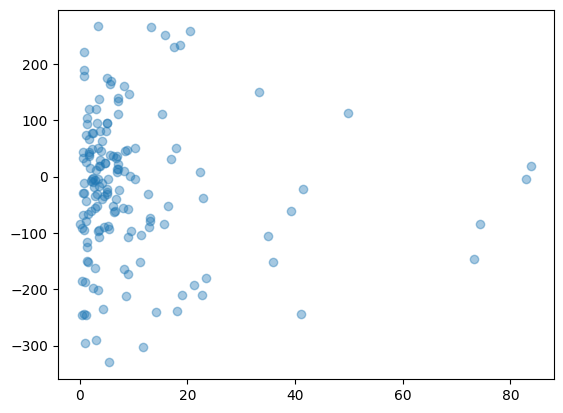

In [50]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
ra_array = np.array(final_df['RA (degrees)']) * u.degree
dec_array = np.array(final_df['DEC (degrees)']) * u.degree
distance_array = (np.array(final_df['Parallax (mas)']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(final_df['pmra']) * u.mas / u.yr
pm_dec_array = np.array(final_df['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(final_df['v_r']) * u.km / u.s


# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,246, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    v_x, v_y, v_z = g.v_x.value, g.v_y.value, g.v_z.value
    
    # Convert to cylindrical coordinates
    R = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    v_R = (x * v_x + y * v_y) / R
    v_phi = (x * v_y - y * v_x) / R
    return np.array([R, phi, z, v_R, v_phi, v_z, np.abs(z)])

plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),alpha=0.4)



In [49]:
(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0])
(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3])


array([ 8.84325435e+00,  9.13788157e+00,  1.34291848e+02, -2.10018449e+02,
       -8.89339113e+01,  3.13097525e+01,  1.91916516e+01, -8.42196669e+01,
       -1.05929935e+02,  1.11541267e+02,  5.02670758e+01, -8.39078631e+01,
       -4.13087815e+00, -6.20181552e+01, -2.43478725e+02, -1.50919394e+02,
        4.79055503e+01, -1.47129925e+02, -1.06943128e+02, -2.15254812e+01,
       -2.10261312e+02,  5.10044495e+01,  2.13286346e+01, -2.37743511e+02,
       -1.63905981e+02,  1.11416942e+02, -9.27559340e+01, -8.74176206e+01,
       -6.30544495e+01, -3.91196098e+01, -2.12460969e+02, -1.92311195e+02,
        1.64256106e+02, -5.80220386e+01, -1.79229636e+02, -2.39886910e+02,
       -3.79220960e+01, -5.50150333e+01,  1.84168885e+01, -2.89984416e+02,
       -3.50771875e+01,  3.85702927e+01, -3.14514995e+01,  6.34915599e+01,
       -2.35277770e+02,  1.11865466e+02,  3.68990626e+01, -5.15486494e+01,
       -4.08708057e+00, -4.30183465e+01, -5.07043861e+00, -6.09639960e+01,
       -4.89684287e+00, -

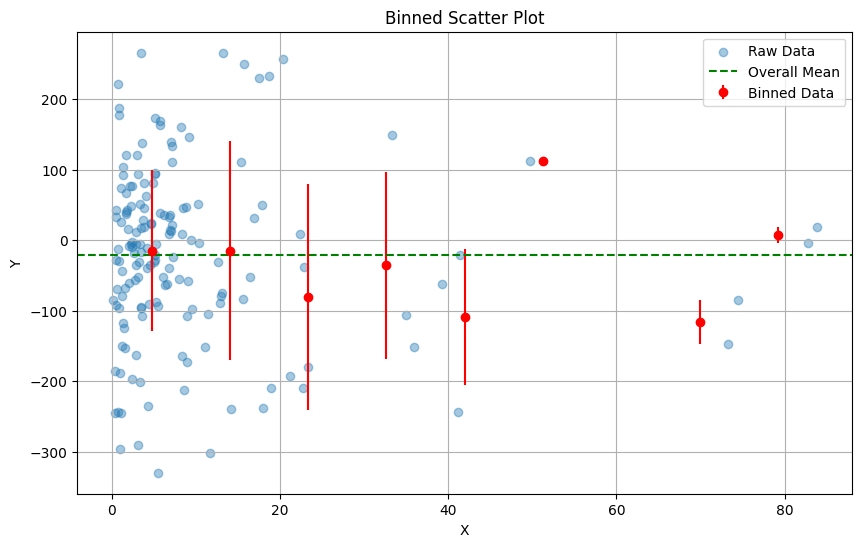

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for scatter plot
np.random.seed(42)
x = (transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0])
y = (transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3])

# Define bin edges and bin centers
num_bins = 9
bin_edges = np.linspace(np.min(x), np.max(x), num_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Bin the data
bin_indices = np.digitize(x, bin_edges, right=True)
binned_means = [y[bin_indices == i].mean() if len(y[bin_indices == i]) > 0 else np.nan for i in range(1, num_bins + 1)]
binned_stds = [y[bin_indices == i].std() if len(y[bin_indices == i]) > 0 else np.nan for i in range(1, num_bins + 1)]

# Create scatter plot and binned data plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.4, label='Raw Data')
plt.errorbar(bin_centers, binned_means, yerr=binned_stds, fmt='o', color='red', label='Binned Data')
plt.axhline(np.mean(y), color='green', linestyle='--', label='Overall Mean')

# Customize plot
plt.title('Binned Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'NaN' is not defined

In [183]:
from astroquery.gaia import Gaia

# Define the query
query = """
SELECT TOP  *
FROM gaiadr3.gaia_source
WHERE parallax_over_error >= 5
  AND parallax > 0
  AND (4.74 / parallax * pm) >= 145
  AND phot_g_mean_mag + 5 + 5*log10(parallax/1000) < 
      138.07*POWER(bp_rp,6) - 153.85*POWER(bp_rp,5) 
      - 40.727*POWER(bp_rp,4) + 73.368*POWER(bp_rp,3) 
      - 7.4054*POWER(bp_rp,2) - 9.5575*bp_rp + 3.8459
  AND phot_g_mean_mag + 5 + 5*log10(parallax/1000) > 
      -3.2382*POWER(bp_rp,3) + 7.1259*POWER(bp_rp,2) 
      - 3.583*bp_rp - 0.2
  AND bp_rp < 0.5 
  AND bp_rp > -0.4
"""

# Execute the query
job = Gaia.launch_job(query)
BHB = job.get_results()

# Print or inspect the result
BHB


solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,

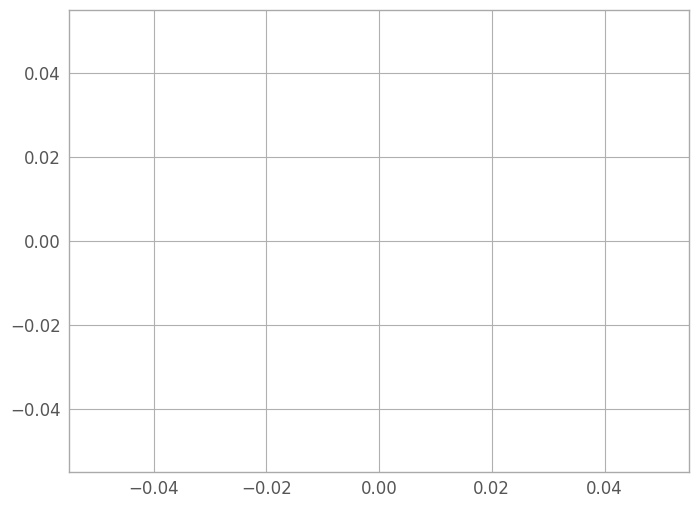

In [179]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
ra_array = np.array(BHB['ra']) * u.degree
dec_array = np.array(BHB['dec']) * u.degree
distance_array = (np.array(BHB['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(BHB['pmra']) * u.mas / u.yr
pm_dec_array = np.array(BHB['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(BHB['radial_velocity']) * u.km / u.s
radial_velocity_error = np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error = np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error = np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,246, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    v_x, v_y, v_z = g.v_x.value, g.v_y.value, g.v_z.value
    
    # Convert to cylindrical coordinates
    R = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    v_R = (x * v_x + y * v_y) / R
    v_phi = (x * v_y - y * v_x) / R
    return np.array([R, phi, z, v_R, v_phi, v_z, np.abs(z)])

plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),alpha=0.4)



In [172]:
file_path=r"C:\Users\sutir\OneDrive\Desktop\Rot_curve\Gaia_BHB.csv"
result_bhb=pd.read_csv(file_path)

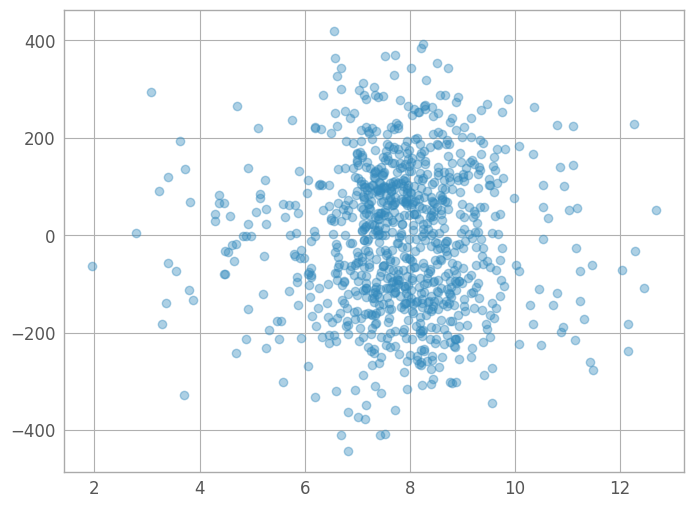

In [208]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
ra_array = np.array(result_bhb['ra']) * u.degree
dec_array = np.array(result_bhb['dec']) * u.degree
distance_array = (np.array(result_bhb['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(result_bhb['pmra']) * u.mas / u.yr
pm_dec_array = np.array(result_bhb['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(result_bhb['radial_velocity']) * u.km / u.s


# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,246, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    v_x, v_y, v_z = g.v_x.value, g.v_y.value, g.v_z.value
    
    # Convert to cylindrical coordinates
    R = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    v_R = (x * v_x + y * v_y) / R
    v_phi = (x * v_y - y * v_x) / R
    return np.array([R, phi, z, v_R, v_phi, v_z, np.abs(z)])

plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),alpha=0.4)



#<matplotlib.collections.PathCollection at 0x18fd7ae43d0>

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
external.xgboost_table1
external.xgboost_table2
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood
gaiadr1.cepheid
gaiadr1.phot_variable_time_series_gfov
gaiadr1.phot_variable_time_series_gfov_statistical_parameters
gaiadr1.rrlyrae
gaiadr1.variable_summary
gaiadr1.allwise_original_valid
gaiadr1.gsc23_original_valid
gaiadr1.ppmxl_original_valid
gaiadr1.sdssdr9_original_valid
gaiadr1.tmass_original_valid
gaiadr1.ucac4_original_valid
gaiadr1.urat1_original_valid
gaiadr1.gaia_source
gaiadr1.tgas_source
gaiadr2.aux_allwise_agn_gdr2_cross_id
gaiadr2.aux_iers_gdr2_cross_id
gaiadr2.aux_sso_orbit_residuals
gaiadr2.aux_sso_orbits
gaiadr2.dr1_neighbourhood
gaiadr2.allwise_best_neighbour
gaiadr2.allwise_neighbourhood
gaiadr2.apassdr9_best_neighbour
gaiadr2.apassdr9_neighbourhood
gaiadr2.gsc23_best_neighbour
gaiadr2.gsc23_neighbourhood
gaiadr2.hipparcos2_best_neighbour
gaiadr2.hipparcos2_neighbourhood
gaiadr2.panstarrs1_best_neighbour
gaiadr2.panstarrs1_neighbourhood
gaiadr2.ppmxl_best_neighbour
gaiadr2.ppmxl_neighbourhood
gaiadr2.ravedr5_best_neighbour
gaiadr2.ravedr5_neighbourhood
gaiadr2.sdssdr9_best_neighbour
gaiadr2.sdssdr9_neighbourhood
gaiadr2.tmass_best_neighbour
gaiadr2.tmass_neighbourhood
gaiadr2.tycho2_best_neighbour
gaiadr2.tycho2_neighbourhood
gaiadr2.urat1_best_neighbour
gaiadr2.urat1_neighbourhood
gaiadr2.sso_observation
gaiadr2.sso_source
gaiadr2.vari_cepheid
gaiadr2.vari_classifier_class_definition
gaiadr2.vari_classifier_definition
gaiadr2.vari_classifier_result
gaiadr2.vari_long_period_variable
gaiadr2.vari_rotation_modulation
gaiadr2.vari_rrlyrae
gaiadr2.vari_short_timescale
gaiadr2.vari_time_series_statistics
gaiadr2.panstarrs1_original_valid
gaiadr2.gaia_source
gaiadr2.ruwe
gaiadr3.gaia_source
gaiadr3.gaia_source_lite
gaiadr3.astrophysical_parameters
gaiadr3.astrophysical_parameters_supp
gaiadr3.oa_neuron_information
gaiadr3.oa_neuron_xp_spectra
gaiadr3.total_galactic_extinction_map
gaiadr3.total_galactic_extinction_map_opt
gaiadr3.commanded_scan_law
gaiadr3.allwise_best_neighbour
gaiadr3.allwise_neighbourhood
gaiadr3.apassdr9_best_neighbour
gaiadr3.apassdr9_join
gaiadr3.apassdr9_neighbourhood
gaiadr3.dr2_neighbourhood
gaiadr3.gsc23_best_neighbour
gaiadr3.gsc23_join
gaiadr3.gsc23_neighbourhood
gaiadr3.hipparcos2_best_neighbour
gaiadr3.hipparcos2_neighbourhood
gaiadr3.panstarrs1_best_neighbour
gaiadr3.panstarrs1_join
gaiadr3.panstarrs1_neighbourhood
gaiadr3.ravedr5_best_neighbour
gaiadr3.ravedr5_join
gaiadr3.ravedr5_neighbourhood
gaiadr3.ravedr6_best_neighbour
gaiadr3.ravedr6_join
gaiadr3.ravedr6_neighbourhood
gaiadr3.sdssdr13_best_neighbour
gaiadr3.sdssdr13_join
gaiadr3.sdssdr13_neighbourhood
gaiadr3.skymapperdr2_best_neighbour
gaiadr3.skymapperdr2_join
gaiadr3.skymapperdr2_neighbourhood
gaiadr3.tmass_psc_xsc_best_neighbour
gaiadr3.tmass_psc_xsc_join
gaiadr3.tmass_psc_xsc_neighbourhood
gaiadr3.tycho2tdsc_merge_best_neighbour
gaiadr3.tycho2tdsc_merge_neighbourhood
gaiadr3.urat1_best_neighbour
gaiadr3.urat1_neighbourhood
gaiadr3.galaxy_candidates
gaiadr3.galaxy_catalogue_name
gaiadr3.qso_candidates
gaiadr3.qso_catalogue_name
gaiadr3.nss_acceleration_astro
gaiadr3.nss_non_linear_spectro
gaiadr3.nss_two_body_orbit
gaiadr3.nss_vim_fl
gaiadr3.binary_masses
gaiadr3.chemical_cartography
gaiadr3.gold_sample_carbon_stars
gaiadr3.gold_sample_fgkm_stars
gaiadr3.gold_sample_oba_stars
gaiadr3.gold_sample_solar_analogues
gaiadr3.gold_sample_spss
gaiadr3.gold_sample_ucd
gaiadr3.sso_orbits
gaiadr3.synthetic_photometry_gspc
gaiadr3.vari_spurious_signals
gaiadr3.agn_cross_id
gaiadr3.frame_rotator_source
gaiadr3.gaia_crf3_xm
gaiadr3.alerts_mixedin_sourceids
gaiadr3.science_alerts
gaiadr3.gaia_source_simulation
gaiadr3.gaia_universe_model
gaiadr3.sso_observation
gaiadr3.sso_reflectance_spectrum
gaiadr3.sso_source
gaiadr3.xp_summary
gaiadr3.vari_agn
gaiadr3.vari_cepheid
gaiadr3.vari_classifier_class_definition
gaiadr3.vari_classifier_definition
gaiadr3.vari_classifier_result
gaiadr3.vari_compact_companion
gaiadr3.vari_eclipsing_binary
gaiadr3.vari_epoch_radial_velocity
gaiadr3.vari_long_period_variable
gaiadr3.vari_microlensing
gaiadr3.vari_ms_oscillator
gaiadr3.vari_planetary_transit
gaiadr3.vari_planetary_transit_13june2022
gaiadr3.vari_rad_vel_statistics
gaiadr3.vari_rotation_modulation
gaiadr3.vari_rrlyrae
gaiadr3.vari_short_timescale
gaiadr3.vari_summary
gaiadr3.tycho2tdsc_merge
gaiaedr3.gaia_source
gaiaedr3.agn_cross_id
gaiaedr3.commanded_scan_law
gaiaedr3.dr2_neighbourhood
gaiaedr3.frame_rotator_source
gaiaedr3.allwise_best_neighbour
gaiaedr3.allwise_neighbourhood
gaiaedr3.apassdr9_best_neighbour
gaiaedr3.apassdr9_join
gaiaedr3.apassdr9_neighbourhood
gaiaedr3.gsc23_best_neighbour
gaiaedr3.gsc23_join
gaiaedr3.gsc23_neighbourhood
gaiaedr3.hipparcos2_best_neighbour
gaiaedr3.hipparcos2_neighbourhood
gaiaedr3.panstarrs1_best_neighbour
gaiaedr3.panstarrs1_join
gaiaedr3.panstarrs1_neighbourhood
gaiaedr3.ravedr5_best_neighbour
gaiaedr3.ravedr5_join
gaiaedr3.ravedr5_neighbourhood
gaiaedr3.sdssdr13_best_neighbour
gaiaedr3.sdssdr13_join
gaiaedr3.sdssdr13_neighbourhood
gaiaedr3.skymapperdr2_best_neighbour
gaiaedr3.skymapperdr2_join
gaiaedr3.skymapperdr2_neighbourhood
gaiaedr3.tmass_psc_xsc_best_neighbour
gaiaedr3.tmass_psc_xsc_join
gaiaedr3.tmass_psc_xsc_neighbourhood
gaiaedr3.tycho2tdsc_merge_best_neighbour
gaiaedr3.tycho2tdsc_merge_neighbourhood
gaiaedr3.urat1_best_neighbour
gaiaedr3.urat1_neighbourhood
gaiaedr3.gaia_source_simulation
gaiaedr3.gaia_universe_model
gaiaedr3.tycho2tdsc_merge
gaiafpr.crowded_field_source
gaiafpr.lens_candidates
gaiafpr.lens_catalogue_name
gaiafpr.lens_observation
gaiafpr.lens_outlier
gaiafpr.sso_observation
gaiafpr.sso_source
gaiafpr.interstellar_medium_params
gaiafpr.interstellar_medium_spectra
gaiafpr.vari_epoch_radial_velocity
gaiafpr.vari_long_period_variable
gaiafpr.vari_rad_vel_statistics
public.hipparcos
public.hipparcos_newreduction
public.hubble_sc
public.igsl_source
public.igsl_source_catalog_ids
public.tycho2
public.dual
tap_config.coord_sys
tap_config.properties
tap_schema.columns
tap_schema.key_columns
tap_schema.keys
tap_schema.schemas
tap_schema.tables

In [31]:
from astroquery.gaia import Gaia

# Query to join vari_rrlyrae with gaia_source to fetch pmra, pmdec, radial_velocity
query = """
SELECT TOP 80000 vrr.*, gs.pmra, gs.pmdec, gs.radial_velocity, gs.parallax,gs.ra,gs.dec
FROM gaiadr3.vari_classifier_result AS vrr
JOIN gaiadr3.gaia_source AS gs
ON vrr.source_id = gs.source_id
-- Adjust the threshold as needed


"""

# Fetch the data
job = Gaia.launch_job(query)
cep = job.get_results()
cep


solution_id,SOURCE_ID,classifier_name,best_class_name,best_class_score,pmra,pmdec,radial_velocity,parallax,ra,dec
,,,,,mas / yr,mas / yr,km / s,mas,deg,deg
int64,int64,object,object,float32,float64,float64,float32,float64,float64,float64
375316653866487564,5902284490717516928,nTransits:5+,ECL,0.4509992,-5.068216976009888,-5.060293604376566,--,0.13771485274634676,227.93867506710782,-50.016176915557544
375316653866487564,5902284731235703680,nTransits:5+,ECL,0.83406353,-5.164241488658805,-3.0503925006428174,--,-0.34285940289121974,227.9946261434677,-49.99488696508651
375316653866487564,5902284967451738240,nTransits:5+,ECL,0.12829061,-9.196864319445636,-6.746274145226861,--,-0.04381446176810849,227.99211899224534,-49.9673919726687
375316653866487564,5902285104890627584,nTransits:5+,LPV,0.038731564,-5.300774444581906,-4.359116573403365,--,0.07858323485611718,227.91100509229005,-50.01805224625784
375316653866487564,5902285207968645376,nTransits:5+,DSCT|GDOR|SXPHE,0.27505866,-2.0009154524864083,-2.650099777569929,--,0.28854405225937696,227.9110113668507,-50.004522204666095
375316653866487564,5902285315377331200,nTransits:5+,LPV,0.9638877,-4.161932888574798,-2.2696169318571657,-133.41618,0.03329954542867533,227.91460089772892,-49.98067963704461
375316653866487564,5902286140011111424,nTransits:5+,SOLAR_LIKE,0.5208819,-3.3796355113315695,-2.5360789683348957,--,1.576391994434206,227.93293403063856,-49.919416869036375
375316653866487564,5902286517968188160,nTransits:5+,SOLAR_LIKE,0.36072522,-10.020730571867436,-6.299624271128045,--,1.2969479877490742,228.0055209714378,-49.941306828592346


(-500.0, 500.0)

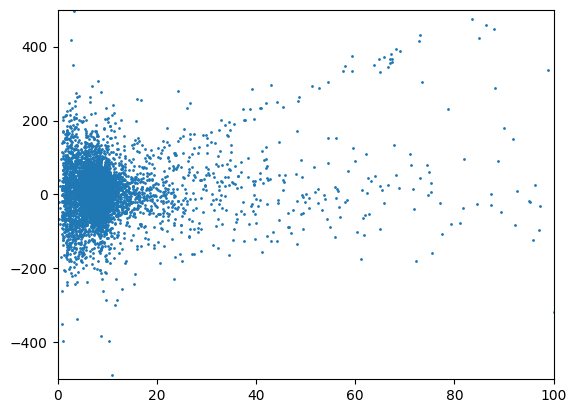

In [32]:


import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
ra_array = np.array(cep['ra']) * u.degree
dec_array = np.array(cep['dec']) * u.degree
distance_array = (np.array(cep['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(cep['pmra']) * u.mas / u.yr
pm_dec_array = np.array(cep['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(cep['radial_velocity']) * u.km / u.s


# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,246, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    v_x, v_y, v_z = g.v_x.value, g.v_y.value, g.v_z.value
    
    # Convert to cylindrical coordinates
    R = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    v_R = (x * v_x + y * v_y) / R
    v_phi = (x * v_y - y * v_x) / R
    return np.array([R, phi, z, v_R, v_phi, v_z, np.abs(z)])

plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),s=1)

plt.xlim(0,100)
plt.ylim(-500,500)